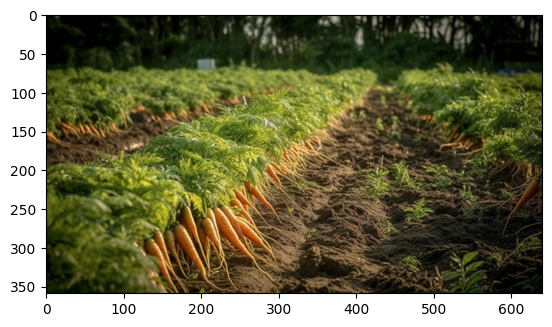

In [59]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('cenoura.png'))

## Verifica se as condições climáticas altera o preço da cenoura e prediz o seu preço

- Tem-se verificado um constante aumento de preços da cenoura no varejo, para o consumidor final.

- Segundo o G1 o calor foi o responsável pela redução da produção de cenouras.

https://g1.globo.com/economia/agronegocios/noticia/2024/03/12/por-que-os-precos-da-cenoura-batata-e-cebola-estao-nas-alturas.ghtml

- Segundo o site HF Brasil as chuvas impediram a colheita com maquinário atrasando o plantio das safras seguintes.

https://www.hfbrasil.org.br/br/hortifruti-cepea-efeitos-do-el-nio-no-desenvolvimento-das-hortalicas-no-verao-2023-24.aspx 

- Neste projeto, através de dados do clima, o objetivo é confirmar se as condições climáticas estão prejudicando
a safra de cenouras e qual seria o preço desse legume.

- Escolheu-se os dados da região de São Gotardo - MG que é responsável pela maior parte da produção de cenouras
do Brasil, distribuindo para a região e Triângulo Mineiro.

- Os dados climáticos são da região de São Gotardo - MG e os dados de preços do produtor são do Triângulo Mineiro.

https://www.hfbrasil.org.br/br/banco-de-dados-precos-medios-dos-hortifruticolas.aspx

https://portal.inmet.gov.br/dadoshistoricos

## Faz a limpeza dos dados e os devidos tratamentos deixando-os prontos para análise

In [60]:
# importa bibliotecas
import pandas as pd
from pandasql import sqldf

In [61]:
# carrega arquivo de cotações de cenoura
cenoura = pd.read_excel('arquivos/cepea_cenoura_2021-2024.xlsx')

In [62]:
# carrega arquivos de variáveis climáticas da região de São Gotardo, responsável pela oferta no Triângulo Mineiro
clima1 = pd.read_csv('arquivos/inmet_araxa_2021.csv', sep=';', encoding='latin-1')
clima2 = pd.read_csv('arquivos/inmet_araxa_2022.csv', sep=';', encoding='latin-1')
clima3 = pd.read_csv('arquivos/inmet_araxa_2023.csv', sep=';', encoding='latin-1')
clima4 = pd.read_csv('arquivos/inmet_araxa_2024.csv', sep=';', encoding='latin-1')

- ### Reconhecimento e tratamento dos dados de preço da cenoura

In [63]:
# verifica quantas linhas e quantas colunas tem no data frame de cotações de preço
cenoura.shape

(695, 8)

In [64]:
# analisa as primeiras linhas
# colunas de Produto, Região, data separada em Dia, Mês e Ano, Unidade de peso e Preço da cotação
cenoura.head(3)

,Produto,Região,Dia,Mês,Ano,Moeda,Unidade kg,Preço
0,Verao A lavada - beneficiador,Triangulo Mineiro/Alto Paranaiba,29,2,2024,R$,20,50.0
1,Verao AAA lavada - beneficiador,Triangulo Mineiro/Alto Paranaiba,29,2,2024,R$,20,117.5
2,Verao G lavada - beneficiador,Triangulo Mineiro/Alto Paranaiba,29,2,2024,R$,20,95.0


In [65]:
# verifica se os tipos de variáveis estão coerentes e se tem algum dado nulo
# Não existe nenhum dado nulo, todos os valores de non-null é o mesmo do total de linhas do df
cenoura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Produto     695 non-null    object 
 1   Região      695 non-null    object 
 2   Dia         695 non-null    int64  
 3   Mês         695 non-null    int64  
 4   Ano         695 non-null    int64  
 5   Moeda       695 non-null    object 
 6   Unidade kg  695 non-null    int64  
 7   Preço       695 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 43.6+ KB


In [66]:
# verifica se tem algum produto (forma comercial de cenoura) com nome duplicado
cenoura.groupby('Produto').count()

,Região,Dia,Mês,Ano,Moeda,Unidade kg,Preço
Produto,,,,,,,
Inverno A lavada - beneficiador,76,76,76,76,76,76,76
Inverno A lavada - atacado,1,1,1,1,1,1,1
Inverno AAA lavada - atacado,1,1,1,1,1,1,1
Inverno AAA lavada - beneficiador,74,74,74,74,74,74,74
Inverno G lavada - atacado,4,4,4,4,4,4,4
Inverno G lavada - beneficiador,74,74,74,74,74,74,74
Inverno suja - produtor,74,74,74,74,74,74,74
Verao A lavada - beneficiador,96,96,96,96,96,96,96
Verao AAA - atacado,2,2,2,2,2,2,2


In [67]:
# cria coluna de preço por kg para colocar todos os preços na mesma unidade de medida (kg)
cenoura['Preço_kg'] = round(cenoura['Preço']/cenoura['Unidade kg'], 2)

In [68]:
# cria coluna de anomesdia numerica
cenoura['ano_mes_dia'] = (((cenoura.Ano * 100) + cenoura['Mês']) * 100) + cenoura.Dia

In [69]:
# separa somente as colunas que serão utilizadas
cenoura = cenoura[['Produto', 'Preço_kg', 'ano_mes_dia']]

In [70]:
# verifica se as linhas e colunas foram separadas devidamente
cenoura.head(3)

,Produto,Preço_kg,ano_mes_dia
0,Verao A lavada - beneficiador,2.50,20240229
1,Verao AAA lavada - beneficiador,5.88,20240229
2,Verao G lavada - beneficiador,4.75,20240229


- ### Reconhecimento e tratamento dos dados de clima da região produtora

In [71]:
# junta todas as linhas dos dfs de clima em um único dataframe
clima = pd.concat([clima1, clima2, clima3, clima4], ignore_index=True)

In [72]:
# verifica se todas as linhas foram concatenadas
print('clima1', clima1.shape)
print('clima2', clima2.shape)
print('clima3', clima3.shape)
print('clima4', clima4.shape)

total_linhas = (clima1.shape[0]) + (clima2.shape[0]) + (clima3.shape[0]) + (clima4.shape[0])

print('total linhas      ', clima.shape[0])
print('total linhas soma ', total_linhas)

clima1 (8760, 20)
clima2 (8760, 20)
clima3 (8760, 20)
clima4 (1440, 19)
total linhas       27720
total linhas soma  27720


In [73]:
# faz um reconhecimento inicial do df clima
clima.head(3)

,Data,Hora UTC,PRECIPITAÇÃO TOTAL. HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR. HORARIA (%),VENTO. DIREÇÃO HORARIA (gr) (° (gr)),VENTO. RAJADA MAXIMA (m/s),VENTO. VELOCIDADE HORARIA (m/s),Unnamed: 19
0,2021/01/01,0000 UTC,0.0,902.2,902.2,901.4,2018.6,24.0,17.5,24.2,23.9,18.1,17.3,70.0,66.0,67.0,87.0,3.9,1.7,NaN
1,2021/01/01,0100 UTC,0.0,902.6,902.6,902.1,2021.4,22.5,17.7,24.0,22.2,17.7,17.4,75.0,67.0,74.0,166.0,4.1,0.5,NaN
2,2021/01/01,0200 UTC,0.0,902.8,902.8,902.6,2024.4,22.9,17.4,23.0,22.1,17.7,17.2,75.0,70.0,71.0,16.0,2.3,0.6,NaN


In [74]:
# vamos pegar somente as colunas que serão utilizadas, a hora será preservada para a checagem de
# linhas duplicadas e para ordenar as linhas por data e hora
clima = clima[['Data', 'Hora UTC', 'PRECIPITAÇÃO TOTAL. HORÁRIO (mm)', 'TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)',
               'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'UMIDADE RELATIVA DO AR. HORARIA (%)']]

In [75]:
# verifica se a redução do df clima ficou adequado
clima.head(3)

,Data,Hora UTC,PRECIPITAÇÃO TOTAL. HORÁRIO (mm),TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),UMIDADE RELATIVA DO AR. HORARIA (%)
0,2021/01/01,0000 UTC,0.0,24.0,17.5,67.0
1,2021/01/01,0100 UTC,0.0,22.5,17.7,74.0
2,2021/01/01,0200 UTC,0.0,22.9,17.4,71.0


In [76]:
# verifica se os tipos de variáveis estão coerentes e se tem algum dado nulo
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Data                                          27720 non-null  object 
 1   Hora UTC                                      27720 non-null  object 
 2   PRECIPITAÇÃO TOTAL. HORÁRIO (mm)              22736 non-null  float64
 3   TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)  27296 non-null  float64
 4   TEMPERATURA DO PONTO DE ORVALHO (°C)          27296 non-null  float64
 5   UMIDADE RELATIVA DO AR. HORARIA (%)           27296 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [77]:
# verifica quantos e quais os campos estão com dados nulos
clima.isnull().sum()

Data                                               0
Hora UTC                                           0
PRECIPITAÇÃO TOTAL. HORÁRIO (mm)                4984
TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)     424
TEMPERATURA DO PONTO DE ORVALHO (°C)             424
UMIDADE RELATIVA DO AR. HORARIA (%)              424
dtype: int64

In [78]:
# removendo as linhas que possuem precipitação nula
clima = clima.dropna(subset='PRECIPITAÇÃO TOTAL. HORÁRIO (mm)')

In [79]:
"""verifica-se que os demais campos nulos também estavam nas linhas excluidas ficando o df clima
  sem campos nulos """
clima.isnull().sum()

Data                                            0
Hora UTC                                        0
PRECIPITAÇÃO TOTAL. HORÁRIO (mm)                0
TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)    0
TEMPERATURA DO PONTO DE ORVALHO (°C)            0
UMIDADE RELATIVA DO AR. HORARIA (%)             0
dtype: int64

In [80]:
# verifica se tem linha duplicada
clima.duplicated().sum()

0

In [81]:
# verifica se os tipos de variáveis estão coerentes
clima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22736 entries, 0 to 27719
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Data                                          22736 non-null  object 
 1   Hora UTC                                      22736 non-null  object 
 2   PRECIPITAÇÃO TOTAL. HORÁRIO (mm)              22736 non-null  float64
 3   TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)  22736 non-null  float64
 4   TEMPERATURA DO PONTO DE ORVALHO (°C)          22736 non-null  float64
 5   UMIDADE RELATIVA DO AR. HORARIA (%)           22736 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


In [82]:
# junta a data em ano_mes_dia numerica
def data_ano_mes_dia(xdata): 
     
     if xdata[:4] in ('2021', '2022', '2023', '2024'):
          return (((int(xdata[:4]) * 100) + int(xdata[5:7])) * 100) + int(xdata[8:10])
     else:
          return (((int(xdata[6:10]) * 100) + int(xdata[3:5])) * 100) + int(xdata[:2])


In [83]:
# aplica apply na função data_ano_mes_dia para juntar a data em ano mes dia e grava coluna numerica
clima['ano_mes_dia'] = clima['Data'].apply(data_ano_mes_dia)

In [84]:
# inclui a coluna anomes através da coluna ano_mes_dia
clima['ano_mes'] = clima['ano_mes_dia'] // 100

In [85]:
# ordena as linhas por ano_mes_dia e Hora
clima = clima.sort_values(by=["ano_mes_dia", "Hora UTC"])


In [86]:
# verifica o início e o fim das linhas do data frame
display(clima)

,Data,Hora UTC,PRECIPITAÇÃO TOTAL. HORÁRIO (mm),TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),UMIDADE RELATIVA DO AR. HORARIA (%),ano_mes_dia,ano_mes
0,2021/01/01,0000 UTC,0.0,24.0,17.5,67.0,20210101,202101
1,2021/01/01,0100 UTC,0.0,22.5,17.7,74.0,20210101,202101
2,2021/01/01,0200 UTC,0.0,22.9,17.4,71.0,20210101,202101
3,2021/01/01,0300 UTC,0.0,22.1,17.3,74.0,20210101,202101
4,2021/01/01,0400 UTC,0.0,20.9,17.1,79.0,20210101,202101
...,...,...,...,...,...,...,...,...
27715,29/02/2024,1900 UTC,0.0,31.7,18.8,46.0,20240229,202402
27716,29/02/2024,2000 UTC,0.0,31.3,17.6,44.0,20240229,202402
27717,29/02/2024,2100 UTC,0.0,30.3,18.5,49.0,20240229,202402
27718,29/02/2024,2200 UTC,0.0,28.5,19.0,57.0,20240229,202402


In [87]:
# apaga a coluna hora
clima = clima.drop('Hora UTC', axis=1)

In [88]:
# calcula o nro da semana dentro do mês conforme o nro de dias da data
def calcula_nro_semana(xdata):
    nro_dias = xdata % 100
    nro_semana_inteiro = nro_dias // 7
    nro_semana_resto = nro_dias % 7

    if nro_semana_resto > 0:
        nro_semana_inteiro += 1

    return nro_semana_inteiro

In [89]:
# cria a coluna nro_semana com os dados calculados em calcula_nro_semana, aplicando apply
clima['nro_semana'] = clima['ano_mes_dia'].apply(calcula_nro_semana)

In [90]:
# calcula o nro da semana anterior dentro do mês conforme o nro de dias da data
xdata_ant = 0
xdata_atu = 0

def calcula_nro_semana_ant(xdata):
    global xdata_ant, xdata_atu

    if xdata_ant == 0:
        xdata_ant = xdata
        xdata_atu = xdata

    if xdata_atu != xdata:
        xdata_ant = xdata_atu
        xdata_atu = xdata        

    nro_dias = xdata_ant % 100
    nro_semana_inteiro = nro_dias // 7
    nro_semana_resto = nro_dias % 7

    if nro_semana_resto > 0:
        nro_semana_inteiro += 1

    return nro_semana_inteiro

In [91]:
# cria a coluna nro_semana anterior com os dados calculados em calcula_nro_semana, aplicando apply
clima['nro_semana_ant'] = clima['ano_mes_dia'].apply(calcula_nro_semana_ant)

In [92]:
# muda o nome das colunas para reduzir o tamanho e facilitar o trabalho e leitura
clima.columns = ['Data', 'precip_hora_mm', 'temp_seco_ceusius', \
                 'temp_orv', 'umidade_ar','ano_mes_dia', 'ano_mes', 'nro_semana', 'nro_semana_ant']

In [93]:
# verifica o tipo de variável da nova coluna ano_mes_dia e nro_semana
clima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22736 entries, 0 to 27719
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Data               22736 non-null  object 
 1   precip_hora_mm     22736 non-null  float64
 2   temp_seco_ceusius  22736 non-null  float64
 3   temp_orv           22736 non-null  float64
 4   umidade_ar         22736 non-null  float64
 5   ano_mes_dia        22736 non-null  int64  
 6   ano_mes            22736 non-null  int64  
 7   nro_semana         22736 non-null  int64  
 8   nro_semana_ant     22736 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 1.7+ MB


In [94]:
# verifica se os dados da coluna ano_mes_dia e nro_semana estão corretos
display(clima)

,Data,precip_hora_mm,temp_seco_ceusius,temp_orv,umidade_ar,ano_mes_dia,ano_mes,nro_semana,nro_semana_ant
0,2021/01/01,0.0,24.0,17.5,67.0,20210101,202101,1,1
1,2021/01/01,0.0,22.5,17.7,74.0,20210101,202101,1,1
2,2021/01/01,0.0,22.9,17.4,71.0,20210101,202101,1,1
3,2021/01/01,0.0,22.1,17.3,74.0,20210101,202101,1,1
4,2021/01/01,0.0,20.9,17.1,79.0,20210101,202101,1,1
...,...,...,...,...,...,...,...,...,...
27715,29/02/2024,0.0,31.7,18.8,46.0,20240229,202402,5,4
27716,29/02/2024,0.0,31.3,17.6,44.0,20240229,202402,5,4
27717,29/02/2024,0.0,30.3,18.5,49.0,20240229,202402,5,4
27718,29/02/2024,0.0,28.5,19.0,57.0,20240229,202402,5,4


In [95]:
# agrupa valores por nro da semana dentro do mês
clima_group = sqldf(" select ano_mes, nro_semana as nro_semana, sum(precip_hora_mm) as precipitação_mm, " \
                        "    max(temp_seco_ceusius) as temp_max, min(temp_orv) as temp_orv, " \
                        "    max(umidade_ar) as umidade_ar" \
                        " from clima " \
                        " group by ano_mes, nro_semana" \
                        " order by ano_mes, nro_semana"
      )

In [96]:
# verifica as linhas do dataframe clima_group
clima_group.head(3)

,ano_mes,nro_semana,precipitação_mm,temp_max,temp_orv,umidade_ar
0,202101,1,92.0,29.5,13.2,94.0
1,202101,2,31.0,29.6,14.5,92.0
2,202101,3,1.4,29.6,9.3,90.0


In [97]:
# junta dataframe clima com clima_group usando ano_mes e nro_semana
cecli = sqldf(" select cl.data, cl.ano_mes_dia, clg.ano_mes, clg.nro_semana, " \
              "        clg.precipitação_mm, clg.temp_max, clg.temp_orv, clg.umidade_ar " \
              " from clima cl " \
              " inner join clima_group clg on (cl.ano_mes = clg.ano_mes and cl.nro_semana = clg.nro_semana) " \
              " order by cl.ano_mes_dia "
      )

In [98]:
# verifica as linhas juntadas no novo dataframe cecli
cecli.head(3)

,Data,ano_mes_dia,ano_mes,nro_semana,precipitação_mm,temp_max,temp_orv,umidade_ar
0,2021/01/01,20210101,202101,1,92.0,29.5,13.2,94.0
1,2021/01/01,20210101,202101,1,92.0,29.5,13.2,94.0
2,2021/01/01,20210101,202101,1,92.0,29.5,13.2,94.0


In [99]:
# junta o dataframe cenoura com o dataframe clima através do ano_mes_dia
cecli = sqldf(" select cl.data, cl.ano_mes, ce.ano_mes_dia, ce.produto, ce.preço_kg, " \
              "        cl.precipitação_mm, cl.temp_max, cl.temp_orv, cl.umidade_ar, " \
              "        cl.nro_semana "
              " from cecli cl " \
              " inner join cenoura ce on (ce.ano_mes_dia = cl.ano_mes_dia) "
              " order by ce.ano_mes_dia "
      )

In [100]:
# junta a data em ano_mes_dia para coluna datetime
def data_date(xdata): 
     
     if xdata[:4] in ('2021', '2022', '2023', '2024'):
          return xdata[:4] + '/' + xdata[5:7] + '/' + xdata[8:10]
     else:
          return xdata[6:10] + '/' + xdata[3:5] + '/' + xdata[:2]

In [101]:
# chama a função data_date para juntar a data em coluna date e grava no df clima
cecli['data_med'] = cecli['Data'].apply(data_date)

In [102]:
# converte data_med para datetime
cecli['data_med'] = pd.to_datetime(cecli['data_med'])

In [103]:
# apaga a coluna Data
cecli = cecli.drop('Data', axis=1)

In [104]:
# verifica os primeiros registros no data frame juntado
cecli.head(5)

,ano_mes,ano_mes_dia,Produto,Preço_kg,precipitação_mm,temp_max,temp_orv,umidade_ar,nro_semana,data_med
0,202101,20210108,Inverno A lavada - beneficiador,0.90,31.0,29.6,14.5,92.0,2,2021-01-08
1,202101,20210108,Inverno AAA lavada - beneficiador,1.70,31.0,29.6,14.5,92.0,2,2021-01-08
2,202101,20210108,Inverno G lavada - beneficiador,1.25,31.0,29.6,14.5,92.0,2,2021-01-08
3,202101,20210108,Inverno suja - produtor,0.86,31.0,29.6,14.5,92.0,2,2021-01-08
4,202101,20210108,Verao A lavada - beneficiador,0.90,31.0,29.6,14.5,92.0,2,2021-01-08


In [105]:
# verifica os tipos de variáveis no data frame juntado
cecli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13536 entries, 0 to 13535
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ano_mes          13536 non-null  int64         
 1   ano_mes_dia      13536 non-null  int64         
 2   Produto          13536 non-null  object        
 3   Preço_kg         13536 non-null  float64       
 4   precipitação_mm  13536 non-null  float64       
 5   temp_max         13536 non-null  float64       
 6   temp_orv         13536 non-null  float64       
 7   umidade_ar       13536 non-null  float64       
 8   nro_semana       13536 non-null  int64         
 9   data_med         13536 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 1.0+ MB


In [106]:
# verifica se tem linha duplicada
cecli.duplicated().sum()

12961

In [107]:
# elimina linhas duplicadas
cecli = cecli.drop_duplicates(keep='last')

In [108]:
# verifica os dados finalizados
# pd.set_option('display.max_rows', None)
cecli.head(3)

,ano_mes,ano_mes_dia,Produto,Preço_kg,precipitação_mm,temp_max,temp_orv,umidade_ar,nro_semana,data_med
184,202101,20210108,Inverno A lavada - beneficiador,0.90,31.0,29.6,14.5,92.0,2,2021-01-08
185,202101,20210108,Inverno AAA lavada - beneficiador,1.70,31.0,29.6,14.5,92.0,2,2021-01-08
186,202101,20210108,Inverno G lavada - beneficiador,1.25,31.0,29.6,14.5,92.0,2,2021-01-08


In [109]:
# verifica quantas linhas sobraram
cecli.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 184 to 13535
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ano_mes          575 non-null    int64         
 1   ano_mes_dia      575 non-null    int64         
 2   Produto          575 non-null    object        
 3   Preço_kg         575 non-null    float64       
 4   precipitação_mm  575 non-null    float64       
 5   temp_max         575 non-null    float64       
 6   temp_orv         575 non-null    float64       
 7   umidade_ar       575 non-null    float64       
 8   nro_semana       575 non-null    int64         
 9   data_med         575 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 49.4+ KB


In [110]:
# verificando a quantidade de ocorrência dos produtos
cecli.Produto.value_counts()

Produto
Verao suja - produtor                74
Verao A lavada - beneficiador        72
Verao AAA lavada - beneficiador      72
Verao G lavada - beneficiador        72
Inverno A lavada  - beneficiador     69
Inverno AAA lavada - beneficiador    69
Inverno G lavada - beneficiador      69
Inverno suja - produtor              68
Inverno G lavada - atacado            4
Verao AAA - atacado                   2
Verao G - atacado                     2
Inverno A lavada - atacado            1
Inverno AAA lavada - atacado          1
Name: count, dtype: int64

In [111]:
# pega somente linhas após a pandemia para evitar distorções
cecli = cecli[cecli.ano_mes > 202206]

In [112]:
# troca o nome do produto para melhor apresentação
cecli.loc[cecli.Produto == 'Verao suja - produtor', 'Produto'] = 'verão suja'
cecli.loc[cecli.Produto == 'Verao A lavada - beneficiador', 'Produto'] = 'verão A'
cecli.loc[cecli.Produto == 'Verao AAA lavada - beneficiador', 'Produto'] = 'verão AAA'
cecli.loc[cecli.Produto == 'Verao G lavada - beneficiador', 'Produto'] = 'verão G'

cecli.loc[cecli.Produto == 'Inverno suja - produtor', 'Produto'] = 'inverno suja'
cecli.loc[cecli.Produto == 'Inverno A lavada  - beneficiador', 'Produto'] = 'inverno A'
cecli.loc[cecli.Produto == 'Inverno AAA lavada - beneficiador', 'Produto'] = 'inverno AAA'
cecli.loc[cecli.Produto == 'Inverno G lavada - beneficiador', 'Produto'] = 'inverno G'

In [113]:
# verifica a quantidade de ocorrência dos produtos em cada tipo de cenoura
print(cecli.Produto.value_counts())

Produto
inverno A                       46
inverno AAA                     46
inverno G                       46
inverno suja                    45
verão suja                      42
verão A                         40
verão AAA                       40
verão G                         40
Inverno G lavada - atacado       2
Verao G - atacado                2
Inverno A lavada - atacado       1
Inverno AAA lavada - atacado     1
Verao AAA - atacado              1
Name: count, dtype: int64


In [114]:
# separa colunas de interesse
#cecli_data = cecli[['Produto', 'Preço_kg', 'precipitação_mm', 'temp_max', 'temp_orv', 'umidade_ar', 'data_med']]
cecli_data = cecli[['Produto', 'Preço_kg', 'precipitação_mm', 'temp_max', 'data_med']]

In [115]:
# separa dados por tipo de produto
isx = cecli_data[cecli_data['Produto'] == 'inverno suja']
isx = isx.drop('Produto', axis=1)
iax = cecli_data[cecli_data['Produto'] == 'inverno A']
iax = iax.drop('Produto', axis=1)
iaaax = cecli_data[cecli_data['Produto'] == 'inverno AAA']
iaaax = iaaax.drop('Produto', axis=1)
igx = cecli_data[cecli_data['Produto'] == 'inverno G']
igx = igx.drop('Produto', axis=1)

vsx = cecli_data[cecli_data['Produto'] == 'verão suja']
vsx = vsx.drop('Produto', axis=1)
vax = cecli_data[cecli_data['Produto'] == 'verão A']
vax = vax.drop('Produto', axis=1)
vaaax = cecli_data[cecli_data['Produto'] == 'verão AAA']
vaaax = vaaax.drop('Produto', axis=1)
vgx = cecli_data[cecli_data['Produto'] == 'verão G']
vgx = vgx.drop('Produto', axis=1)

In [116]:
# salva os dados tratados em arquivos por tipo de cenoura (produto)
isx.to_csv('arquivos_tratados/isx.csv', index=False)
iax.to_csv('arquivos_tratados/iax.csv', index=False)
iaaax.to_csv('arquivos_tratados/iaaax.csv', index=False)
igx.to_csv('arquivos_tratados/igx.csv', index=False)

vsx.to_csv('arquivos_tratados/vsx.csv', index=False)
vax.to_csv('arquivos_tratados/vax.csv', index=False)
vaaax.to_csv('arquivos_tratados/vaaax.csv', index=False)
vgx.to_csv('arquivos_tratados/vgx.csv', index=False)